Task 1:
This assignment is for visualization using matplotlib:
data to use:

url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

Charts to plot:

1. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
2. Create a pie chart presenting the male/female proportion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
tdf = pd.read_csv(url)

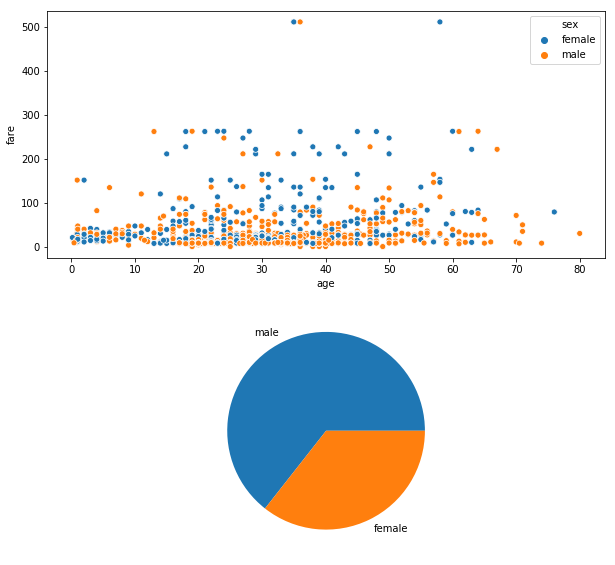

In [3]:
#Answer 1
fig,axs = plt.subplots(nrows=2,ncols=1,figsize =(10,10))
sns.scatterplot(x='age',y='fare' ,hue='sex',data=tdf,ax=axs[0])

#Answer 2
m = tdf['sex'].value_counts()
axs[1].pie(x=m.get_values(),labels=m.index.get_values())
plt.show()

Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [4]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [5]:
m = df[df['FlightNumber'].isna()].index
for i in m:
    df.loc[i ,['FlightNumber']] = 10045 + 10 * i
df['FlightNumber'] = df['FlightNumber'].astype(np.int16)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [6]:
frm_to = df['From_To'].get_values().flatten()
frm_to = np.array(list(map(lambda a : a.split('_'),frm_to)))
temp = pd.DataFrame(data = frm_to,columns=['From','To'])
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [7]:
temp['From'] = list(map(lambda a: a.capitalize(),temp['From'].get_values()))
temp['To'] = list(map(lambda a: a.capitalize(),temp['To'].get_values()))
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [8]:
df.insert(loc=0,column='From',value=temp.iloc[:,0])
df.insert(loc=1,column='To',value=temp.iloc[:,1])
del temp
df.drop(labels=['From_To'],axis=1,inplace=True)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [9]:
recent_delay = df['RecentDelays'].get_values()
mt_len =max(map(lambda a : len(a),recent_delay))
for i in recent_delay:
    lt  = mt_len - len(i)
    if lt != 0 and lt > 0:
        for _ in range(0,lt):
            i.append(np.NaN)
recent_delay = np.array(list(map(lambda a : np.array(a),recent_delay)))

In [10]:
for i in range(0,mt_len):
    df['Delay_'+str(i)] = recent_delay[:,i]

In [11]:
df.drop(['RecentDelays'],axis =1,inplace=True)
df

,From,To,FlightNumber,Airline,Delay_0,Delay_1,Delay_2
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,<Air France> (12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN
